In [21]:
import yfinance as yf


In [22]:
start_date = '2018-12-1'
end_date = '2024-12-1'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2018-12-1  End Date: 2024-12-1


In [23]:
ticker = 'AAPL'

df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-12-03,44.131855,46.205002,46.235001,45.302502,46.115002,163210000
2018-12-04,42.190544,44.172501,45.597500,44.067501,45.237499,165377200
2018-12-06,41.720146,43.680000,43.695000,42.605000,42.939999,172393600
2018-12-07,40.232536,42.122501,43.622501,42.075001,43.372501,169126400
2018-12-10,40.497585,42.400002,42.522499,40.832500,41.250000,248104000
...,...,...,...,...,...,...
2024-11-22,229.869995,229.869995,230.720001,228.059998,228.059998,38168300
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800


In [24]:
df1=df.reset_index()[('Close', 'AAPL')]

In [25]:
df1

0        46.205002
1        44.172501
2        43.680000
3        42.122501
4        42.400002
           ...    
1503    229.869995
1504    232.869995
1505    235.059998
1506    234.929993
1507    237.330002
Name: (Close, AAPL), Length: 1508, dtype: float64

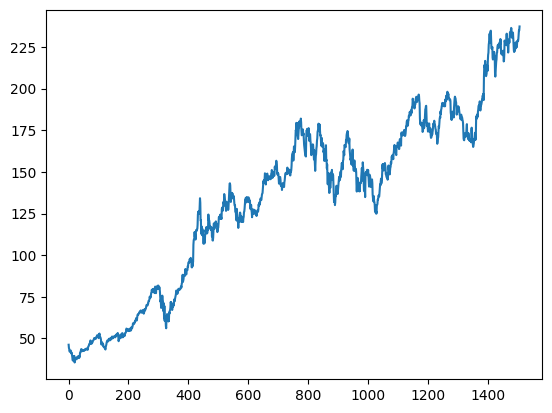

In [26]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [27]:
import numpy as np

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
print(df1)

[[0.05281678]
 [0.04274404]
 [0.0403033 ]
 ...
 [0.98875024]
 [0.98810596]
 [1.        ]]


In [30]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [31]:
training_size,test_size

(980, 528)

In [32]:
train_data

array([[0.05281678],
       [0.04274404],
       [0.0403033 ],
       [0.03258459],
       [0.03395984],
       [0.03275805],
       [0.03334036],
       [0.03563242],
       [0.02885532],
       [0.02694733],
       [0.02958632],
       [0.02316851],
       [0.01813834],
       [0.01058069],
       [0.00574876],
       [0.01855958],
       [0.01729584],
       [0.01739496],
       [0.0192658 ],
       [0.0194888 ],
       [0.        ],
       [0.00752046],
       [0.00711161],
       [0.01060548],
       [0.0137772 ],
       [0.0143843 ],
       [0.01251346],
       [0.00967626],
       [0.01347987],
       [0.01579671],
       [0.01693655],
       [0.01812596],
       [0.01376482],
       [0.01453297],
       [0.01302144],
       [0.01929056],
       [0.0174817 ],
       [0.01547457],
       [0.02857036],
       [0.03004473],
       [0.03014385],
       [0.03600411],
       [0.03963425],
       [0.0397086 ],
       [0.03562004],
       [0.03496339],
       [0.0337492 ],
       [0.035

In [33]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
print(X_train.shape), print(y_train.shape)

(879, 100)
(879,)


(None, None)

In [36]:
print(X_test.shape), print(ytest.shape)

(427, 100)
(427,)


(None, None)

In [37]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate synthetic sequential data
# Replace this with your real sequential dataset
X = np.random.rand(1000, 100)  # Features: 100 time steps
y = np.random.rand(1000)       # Target: single output value

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print loss (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.08683182471937918


In [42]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

TypeError: BaseForest.fit() got an unexpected keyword argument 'validation_data'